In [1]:

# let's cluster text!. Below we can see a list of reviews of Amazon products.
# Text that is found to be homogenous is clustered into the same group. Anything that appears to be heterogenous
# goes into seperate and distinct groups.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["Too small",
            "Great light reader. Easy to use at the beach",
            "Great for the price",
            "A Great Buy",
            "Solid entry-level Kindle. Great for kids",
            "Good ebook",
            "Light Weight - Makes a world of difference when taking books on the go!",
            "not good quality",
            "best ebook",
            "Great Product",
            "Good price excellent reader",
            "feels like a real book",
            "Great readers",
            "Just what my grandson wanted",
            "Great for reading on the go",
            "Does its job",
            "Great!",
            "Work",
            "Great product and service",
            "External pdf does not work properly",
            "Tricked into buying",
            "Easy to use, bare-bones reading device",
            "Great e-reader for beginners",
            "Good Deal for the Price",
            "Great",
            "Easy and simple",
            "Compact and light",
            "Great product at great price.",
            "Great reading tool",
            "Great reader but not perfect",
            "Great product",
            "Great Product",
            "good design",
            "kindle touch",
            "Great",
            "Useful and practical",
            "Great for book reader",
            "This is my new baby",
            "Great ebook reader",
            "Excellent",
            "Great product",
            "A Terrific and Highly Appreciated Gift",
            "Good Product",
            "Love this little e-reader",
            "Loving it!",
            "Love the touch screen",
            "For mom",
            "Great product, well designed",
            "great",
            "Good reader",
            "Great mid-range Kindle",
            "Good for books",
            "Small, light and easy to read",
            "Great reader with long battery life",
            "easy to use",
            "Fabulous Gifting item.",
            "great e book",
            "great update",
            "Great E-Reader",
            "Great Product",
            "unbeatable price",
            "Amazon Kindle is Perfect",
            "Good",
            "good for my teenager",
            "Love to read",
            "Works",
            "Finally started reading again",
            "Nice Product of Kindle begineers",
            "Great E-reader",
            "Great product for its purpose",
            "Don't bother",
            "Great product",
            "Amazon Kindle, Black",
            "The best device for reading",
            "Great product",
            "The home screen is not terribly easy to navigate.",
            "Light and easy",
            "Should have bought paperwhite",
            "Good for entry level reader",
            "Great Kindle quality for a reasonable price.",
            "ughhh ok",
            "Child loves her Kindle",
            "Good for the price",
            "Kindle",
            "Love my kindle",
            "Can convert pdf to kindle format",
            "I like it.",
            "NEW AND IMPROVED",
            "good product",
            "great device",
            "Great e reader",
            "Okay",
            "nice gift",
            "The screen is too dark, and cannot adjust it",
            "Great kindle for the price.",
            "Great Item",
            "Amazon Echo Show - Greatest Gift EVER",
            "Amazon Echo Show",
            "Had to upgrade",
            "Practical, easy to setup"]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")


Top terms per cluster:
Cluster 0:
 kindle
 touch
 love
 amazon
 black
 perfect
 loves
 child
 screen
 format
Cluster 1:
 product
 great
 designed
 purpose
 service
 price
 world
 finally
 ebook
 echo
Cluster 2:
 great
 reading
 readers
 buy
 update
 item
 device
 book
 tool
 kindle
Cluster 3:
 good
 like
 work
 product
 new
 does
 okay
 mom
 loving
 upgrade
Cluster 4:
 gift
 nice
 begineers
 greatest
 appreciated
 terrific
 highly
 echo
 amazon
 kindle
Cluster 5:
 reader
 great
 beginners
 perfect
 book
 good
 little
 love
 life
 battery
Cluster 6:
 light
 compact
 taking
 difference
 makes
 world
 weight
 books
 use
 don
Cluster 7:
 price
 good
 great
 kindle
 unbeatable
 deal
 excellent
 reasonable
 quality
 reader
Cluster 8:
 ebook
 best
 device
 good
 reader
 reading
 great
 finally
 don
 easy
Cluster 9:
 easy
 use
 light
 practical
 simple
 useful
 setup
 small
 read
 beach


Prediction


In [2]:

# After the model has been trained, let's make some predictions about what cluster a new sentence will 
# be associated with

Y = vectorizer.transform(["my child loves the kindle."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["the item works great"])
prediction = model.predict(Y)
print(prediction)


[0]
[2]


C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


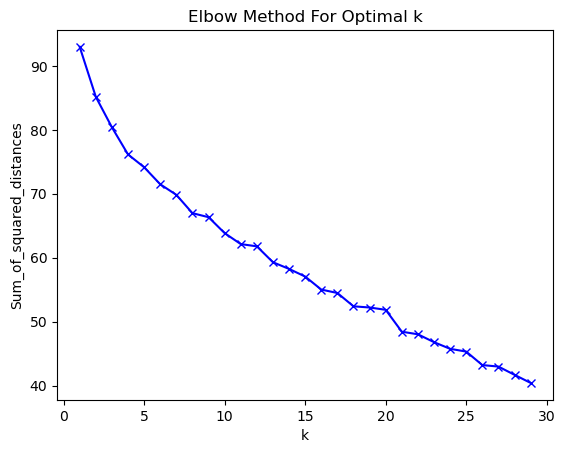

                            title  cluster
9                   Great Product        0
18      Great product and service        0
30                  Great product        0
31                  Great Product        0
40                  Great product        0
47   Great product, well designed        0
59                  Great Product        0
69  Great product for its purpose        0
71                  Great product        0
74                  Great product        0
                    title  cluster
36  Great for book reader        1
56           great e book        1
                        title  cluster
43  Love this little e-reader        2
45      Love the touch screen        2
64               Love to read        2
84             Love my kindle        2
                                           title  cluster
7                               not good quality        3
79  Great Kindle quality for a reasonable price.        3
                                                title

In [3]:

# That was fun, but way too simplistic. Let's look at a more serious example, as illustrated directly below.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["Too small",
            "Great light reader. Easy to use at the beach",
            "Great for the price",
            "A Great Buy",
            "Solid entry-level Kindle. Great for kids",
            "Good ebook",
            "Light Weight - Makes a world of difference when taking books on the go!",
            "not good quality",
            "best ebook",
            "Great Product",
            "Good price excellent reader",
            "feels like a real book",
            "Great readers",
            "Just what my grandson wanted",
            "Great for reading on the go",
            "Does its job",
            "Great!",
            "Work",
            "Great product and service",
            "External pdf does not work properly",
            "Tricked into buying",
            "Easy to use, bare-bones reading device",
            "Great e-reader for beginners",
            "Good Deal for the Price",
            "Great",
            "Easy and simple",
            "Compact and light",
            "Great product at great price.",
            "Great reading tool",
            "Great reader but not perfect",
            "Great product",
            "Great Product",
            "good design",
            "kindle touch",
            "Great",
            "Useful and practical",
            "Great for book reader",
            "This is my new baby",
            "Great ebook reader",
            "Excellent",
            "Great product",
            "A Terrific and Highly Appreciated Gift",
            "Good Product",
            "Love this little e-reader",
            "Loving it!",
            "Love the touch screen",
            "For mom",
            "Great product, well designed",
            "great",
            "Good reader",
            "Great mid-range Kindle",
            "Good for books",
            "Small, light and easy to read",
            "Great reader with long battery life",
            "easy to use",
            "Fabulous Gifting item.",
            "great e book",
            "great update",
            "Great E-Reader",
            "Great Product",
            "unbeatable price",
            "Amazon Kindle is Perfect",
            "Good",
            "good for my teenager",
            "Love to read",
            "Works",
            "Finally started reading again",
            "Nice Product of Kindle begineers",
            "Great E-reader",
            "Great product for its purpose",
            "Don't bother",
            "Great product",
            "Amazon Kindle, Black",
            "The best device for reading",
            "Great product",
            "The home screen is not terribly easy to navigate.",
            "Light and easy",
            "Should have bought paperwhite",
            "Good for entry level reader",
            "Great Kindle quality for a reasonable price.",
            "ughhh ok",
            "Child loves her Kindle",
            "Good for the price",
            "Kindle",
            "Love my kindle",
            "Can convert pdf to kindle format",
            "I like it.",
            "NEW AND IMPROVED",
            "good product",
            "great device",
            "Great e reader",
            "Okay",
            "nice gift",
            "The screen is too dark, and cannot adjust it",
            "Great kindle for the price.",
            "Great Item",
            "Amazon Echo Show - Greatest Gift EVER",
            "Amazon Echo Show",
            "Had to upgrade",
            "Practical, easy to setup"]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
   
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#print('How many clusters do you want to use?')
true_k = 30
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200)
model.fit(X)

labels=model.labels_
clusters=pd.DataFrame(list(zip(documents,labels)),columns=['title','cluster'])
#print(clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(clusters[clusters['cluster'] == i])
    

In [23]:

df = pd.DataFrame(documents, columns=['corpus'])
df.head()


,corpus
0,Too small
1,Great light reader. Easy to use at the beach
2,Great for the price
3,A Great Buy
4,Solid entry-level Kindle. Great for kids


In [24]:

import nltk
from nltk.corpus import stopwords
import regex as re


stopwords.words("english")[:10] # <-- import the english stopwords

def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text


df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df.head()


,corpus,cleaned
0,Too small,small
1,Great light reader. Easy to use at the beach,great light reader easy use beach
2,Great for the price,great price
3,A Great Buy,great buy
4,Solid entry-level Kindle. Great for kids,solid entry level kindle great kids


In [25]:

import numpy as np

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])


from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_


from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]


# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1


def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 0
kindle,great,product,reading,price,reader,light,easy,good

Cluster 1
easy,good,kindle,light,price,reading,reader,product,great

Cluster 2
easy,good,light,reader,reading,product,price,great,kindle


In [26]:
df.head()

,corpus,cleaned,cluster,x0,x1
0,Too small,small,0,-0.191057,0.013015
1,Great light reader. Easy to use at the beach,great light reader easy use beach,0,0.031563,-0.151431
2,Great for the price,great price,1,0.203459,-0.007017
3,A Great Buy,great buy,1,0.666952,0.013023
4,Solid entry-level Kindle. Great for kids,solid entry level kindle great kids,2,0.146539,0.659879


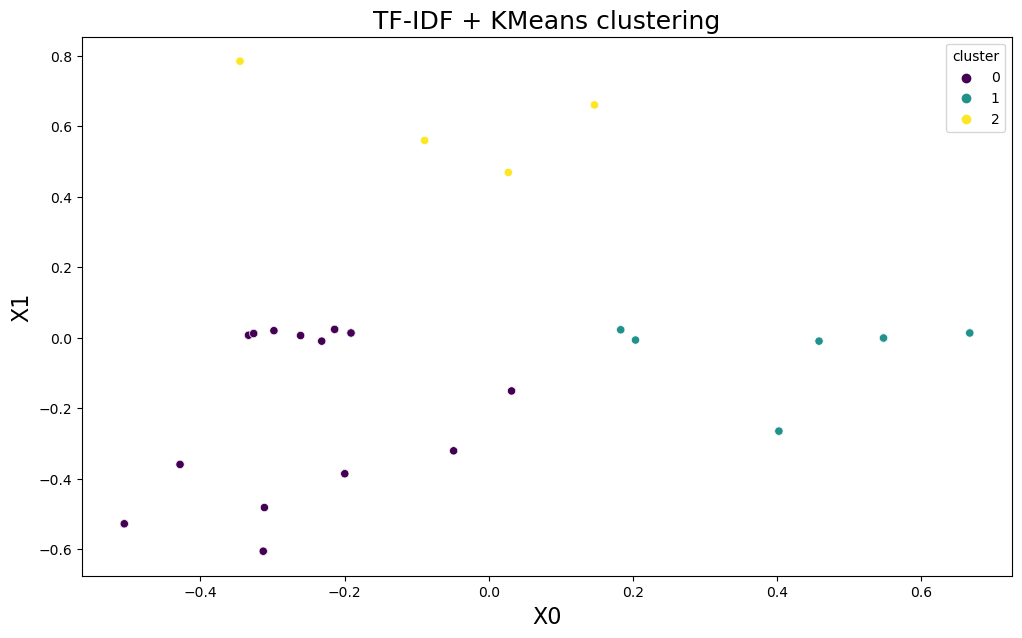

In [27]:

import seaborn as sns

# map clusters to appropriate labels 
cluster_map = {0: "great buy", 1: "small", 2: "solid entry level kindle great kids"}
# apply mapping
df['cleaned'] = df['cleaned'].map(cluster_map)


# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()



In [28]:

# Final example...for now...
# let's cluster entire sentences together, not just words of sentences.


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Preprocessing
documents = ["Too small",
            "Great light reader. Easy to use at the beach",
            "Great for the price",
            "A Great Buy",
            "Solid entry-level Kindle. Great for kids",
            "Good ebook",
            "Light Weight - Makes a world of difference when taking books on the go!",
            "not good quality",
            "best ebook",
            "Great Product",
            "Good price excellent reader",
            "feels like a real book",
            "Great readers",
            "Just what my grandson wanted",
            "Great for reading on the go",
            "Does its job",
            "Great!",
            "Work",
            "Great product and service",
            "External pdf does not work properly",
            "Tricked into buying",
            "Easy to use, bare-bones reading device",
            "Great e-reader for beginners",
            "Good Deal for the Price",
            "Great",
            "Easy and simple",
            "Compact and light",
            "Great product at great price.",
            "Great reading tool",
            "Great reader but not perfect",
            "Great product",
            "Great Product",
            "good design",
            "kindle touch",
            "Great",
            "Useful and practical",
            "Great for book reader",
            "This is my new baby",
            "Great ebook reader",
            "Excellent",
            "Great product",
            "A Terrific and Highly Appreciated Gift",
            "Good Product",
            "Love this little e-reader",
            "Loving it!",
            "Love the touch screen",
            "For mom",
            "Great product, well designed",
            "great",
            "Good reader",
            "Great mid-range Kindle",
            "Good for books",
            "Small, light and easy to read",
            "Great reader with long battery life",
            "easy to use",
            "Fabulous Gifting item.",
            "great e book",
            "great update",
            "Great E-Reader",
            "Great Product",
            "unbeatable price",
            "Amazon Kindle is Perfect",
            "Good",
            "good for my teenager",
            "Love to read",
            "Works",
            "Finally started reading again",
            "Nice Product of Kindle begineers",
            "Great E-reader",
            "Great product for its purpose",
            "Don't bother",
            "Great product",
            "Amazon Kindle, Black",
            "The best device for reading",
            "Great product",
            "The home screen is not terribly easy to navigate.",
            "Light and easy",
            "Should have bought paperwhite",
            "Good for entry level reader",
            "Great Kindle quality for a reasonable price.",
            "ughhh ok",
            "Child loves her Kindle",
            "Good for the price",
            "Kindle",
            "Love my kindle",
            "Can convert pdf to kindle format",
            "I like it.",
            "NEW AND IMPROVED",
            "good product",
            "great device",
            "Great e reader",
            "Okay",
            "nice gift",
            "The screen is too dark, and cannot adjust it",
            "Great kindle for the price.",
            "Great Item",
            "Amazon Echo Show - Greatest Gift EVER",
            "Amazon Echo Show",
            "Had to upgrade",
            "Practical, easy to setup"]

# 2. Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# 3. Choosing the number of clusters
# Example using the silhouette score to find the optimal number of clusters
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# 4. K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Print the clusters
for i, sentence in enumerate(documents):
    print(f"Sentence: {sentence} | Cluster: {labels[i]}")
    

C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sentence: Too small | Cluster: 2
Sentence: Great light reader. Easy to use at the beach | Cluster: 2
Sentence: Great for the price | Cluster: 0
Sentence: A Great Buy | Cluster: 3
Sentence: Solid entry-level Kindle. Great for kids | Cluster: 0
Sentence: Good ebook | Cluster: 2
Sentence: Light Weight - Makes a world of difference when taking books on the go! | Cluster: 2
Sentence: not good quality | Cluster: 2
Sentence: best ebook | Cluster: 2
Sentence: Great Product | Cluster: 1
Sentence: Good price excellent reader | Cluster: 0
Sentence: feels like a real book | Cluster: 2
Sentence: Great readers | Cluster: 3
Sentence: Just what my grandson wanted | Cluster: 2
Sentence: Great for reading on the go | Cluster: 0
Sentence: Does its job | Cluster: 2
Sentence: Great! | Cluster: 3
Sentence: Work | Cluster: 2
Sentence: Great product and service | Cluster: 1
Sentence: External pdf does not work properly | Cluster: 2
Sentence: Tricked into buying | Cluster: 2
Sentence: Easy to use, bare-bones r